# NYC Food Poverty Analysis

This project focuses on analyzing **food poverty in New York City** as part of the **United Nations Sustainable Development Goal: No Poverty (SDG 1)**. The goal of this analysis is to understand patterns of poverty, income distribution, and food assistance availability across NYC, in order to identify areas of high need and potential interventions.  

We are using the following datasets for this analysis:

1. **Income Distribution NYC (`IncomeDistribution_NYC.csv`)**  
   - Provides borough-level income distribution across different income brackets.  
   - Helps to identify which neighborhoods have higher proportions of low-income households.

2. **NYC Census Tracts (`nyc_census_tracts.csv`)**  
   - Contains demographic, socioeconomic, and poverty information at the tract level, including population, child poverty, and employment data.  
   - Provides a more granular view of population characteristics across the city.

3. **Emergency Food Assistance Program (`emergency-food-assistance-program-quarterly-report.csv`)**  
   - Contains quarterly reports of meals distributed by food pantries and soup kitchens in NYC.  
   - Helps to assess the coverage and reach of food assistance programs.

4. **Census Block Locations (`census_block_loc.csv`)**  
   - Contains geographic coordinates for census blocks, which can be used for mapping and spatial analysis.  

By combining these datasets, this analysis aims to explore the relationships between income, poverty, and food assistance, and to highlight neighborhoods where food insecurity is most severe. The insights generated can inform potential solutions to address food poverty in NYC.


## Milestone 1: Merging Data

In [10]:
import pandas as pd
import geopandas as gpd

# load CSVs
income = pd.read_csv("IncomeDistribution_NYC.csv")
census_blocks = pd.read_csv("census_block_loc.csv")
food = pd.read_csv("emergency-food-assistance-program-quarterly-report.csv")
tracts = gpd.read_file("nyc_census_tracts.csv")

# explore columns and first few rows
print("Income columns:", income.columns)
print(income.head())

print("\nCensus block columns:", census_blocks.columns)
print(census_blocks.head())

print("\nFood columns:", food.columns)
print(food.head())

print("\nTracts columns:", tracts.columns)
print(tracts.head())

Income columns: Index(['Geography', 'Name', 'Level', 'year', 'less_than_20_000',
       '20_001 _\n40_000', '40_001 _\n60_000', '60_001 _\n100_000',
       '100_001 _\n250_000', 'more_than_250_000'],
      dtype='object')
  Geography           Name Level       year  less_than_20_000  \
0       NYC  New York City  City       2000              0.16   
1       NYC  New York City  City  2018_2022              0.14   
2        BX      The Bronx  Boro       2000              0.24   
3        BX      The Bronx  Boro  2018_2022              0.24   
4        BK       Brooklyn  Boro       2000              0.20   

   20_001 _\n40_000  40_001 _\n60_000  60_001 _\n100_000  100_001 _\n250_000  \
0              0.15              0.14               0.21                0.27   
1              0.14              0.12               0.19                0.30   
2              0.17              0.16               0.21                0.20   
3              0.19              0.16               0.19           

In [11]:
# remove 'The ' prefix from income['Name'] to match tract borough names
income['Name'] = income['Name'].str.replace('The ', '', regex=False)

# filter to only borough-level rows
income_boro = income[income['Level'] == 'Boro']

# merge
merged = tracts.merge(
    income_boro,
    left_on='Borough',
    right_on='Name',
    how='left'
)

# print out information on the newly merged data
merged[['Borough', 'less_than_20_000', '40_001 _\n60_000']].head()
merged.shape
merged.info()
merged.isna().sum()
merged.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4334 entries, 0 to 4333
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CensusTract        4334 non-null   object 
 1   County             4334 non-null   object 
 2   Borough            4334 non-null   object 
 3   TotalPop           4334 non-null   object 
 4   Men                4334 non-null   object 
 5   Women              4334 non-null   object 
 6   Hispanic           4334 non-null   object 
 7   White              4334 non-null   object 
 8   Black              4334 non-null   object 
 9   Native             4334 non-null   object 
 10  Asian              4334 non-null   object 
 11  Citizen            4334 non-null   object 
 12  Income             4334 non-null   object 
 13  IncomeErr          4334 non-null   object 
 14  IncomePerCap       4334 non-null   object 
 15  IncomePerCapErr    4334 non-null   object 
 16  Poverty            4334 

,less_than_20_000,20_001 _\n40_000,40_001 _\n60_000,60_001 _\n100_000,100_001 _\n250_000,more_than_250_000
count,4334.000000,4334.000000,4334.000000,4334.000000,4334.000000,4334.000000
mean,0.154592,0.144924,0.131857,0.205782,0.287709,0.077716
std,0.050145,0.021074,0.020052,0.022450,0.055328,0.050210
min,0.090000,0.110000,0.090000,0.150000,0.200000,0.020000
25%,0.110000,0.140000,0.120000,0.190000,0.240000,0.040000
50%,0.150000,0.140000,0.120000,0.210000,0.300000,0.080000
75%,0.200000,0.160000,0.150000,0.220000,0.320000,0.100000
max,0.240000,0.190000,0.160000,0.240000,0.400000,0.210000


## Milestone 2: Exploratory Data Analysis (EDA) - Visualizations

In [22]:
# convert numeric columns
numeric_cols = [
    'TotalPop', 'Men', 'Women', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
    'Citizen', 'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr',
    'Poverty', 'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
    'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome',
    'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork',
    'Unemployment'
]

for col in numeric_cols:
    merged[col] = pd.to_numeric(merged[col], errors='coerce')

# check mising values
merged.isna().sum()

,0
CensusTract,0
County,0
Borough,0
TotalPop,0
Men,0
Women,0
Hispanic,78
White,78
Black,78
Native,78


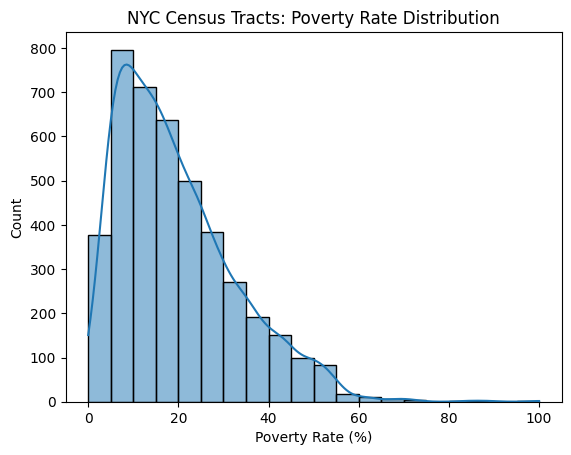

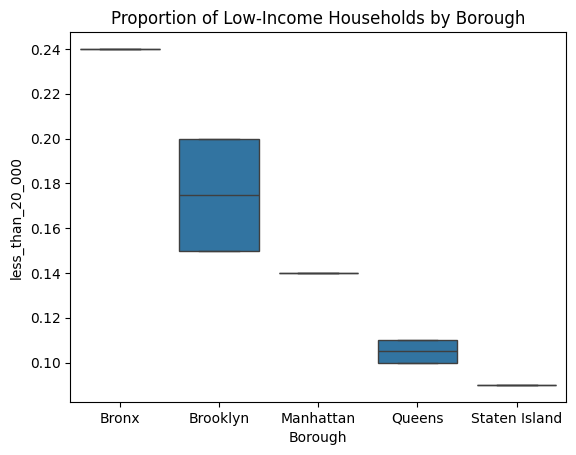

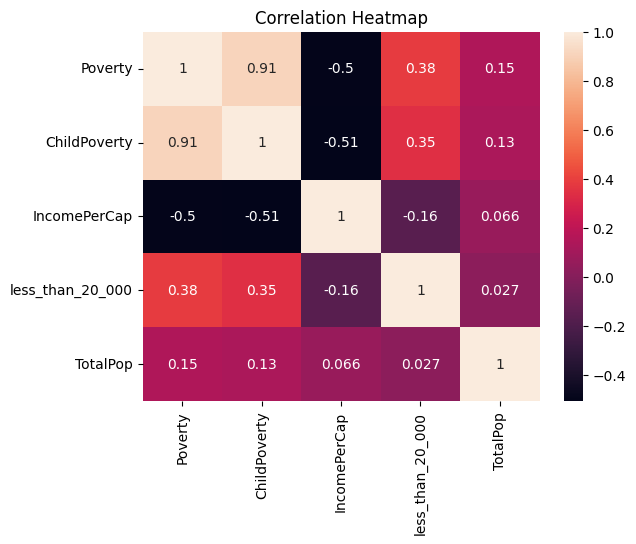

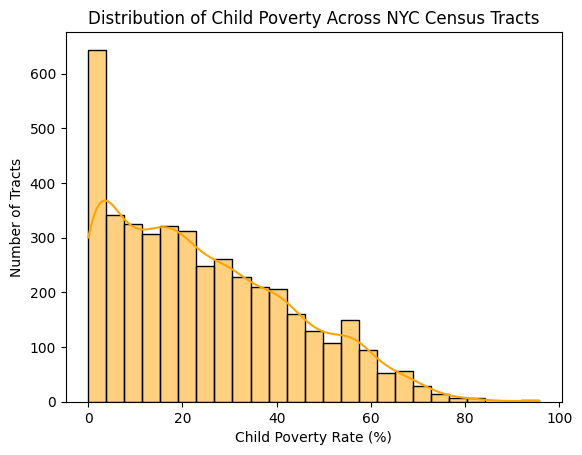

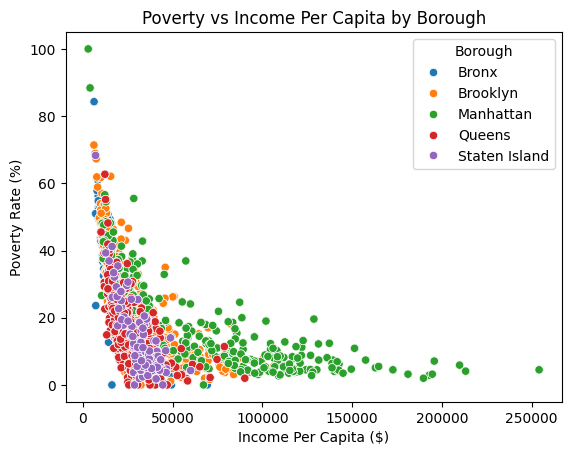

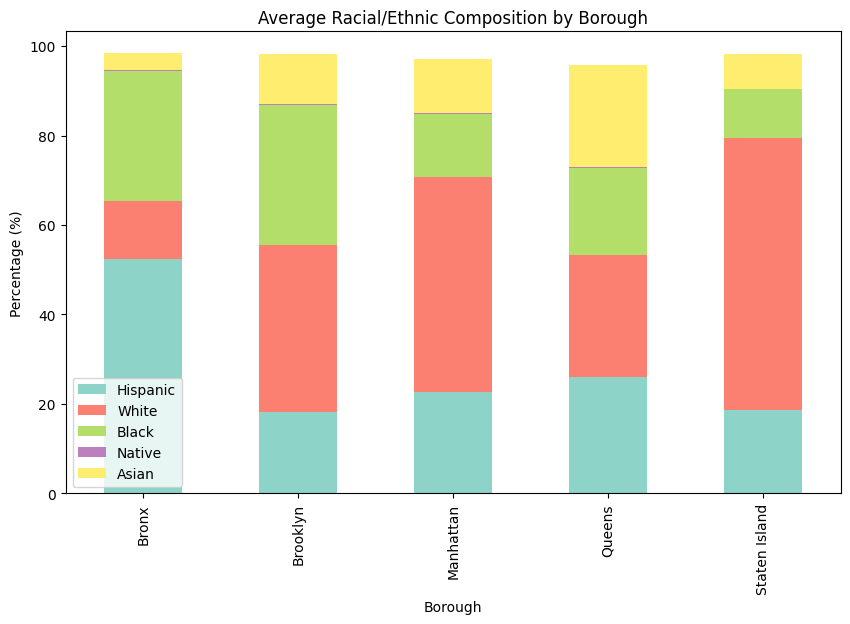

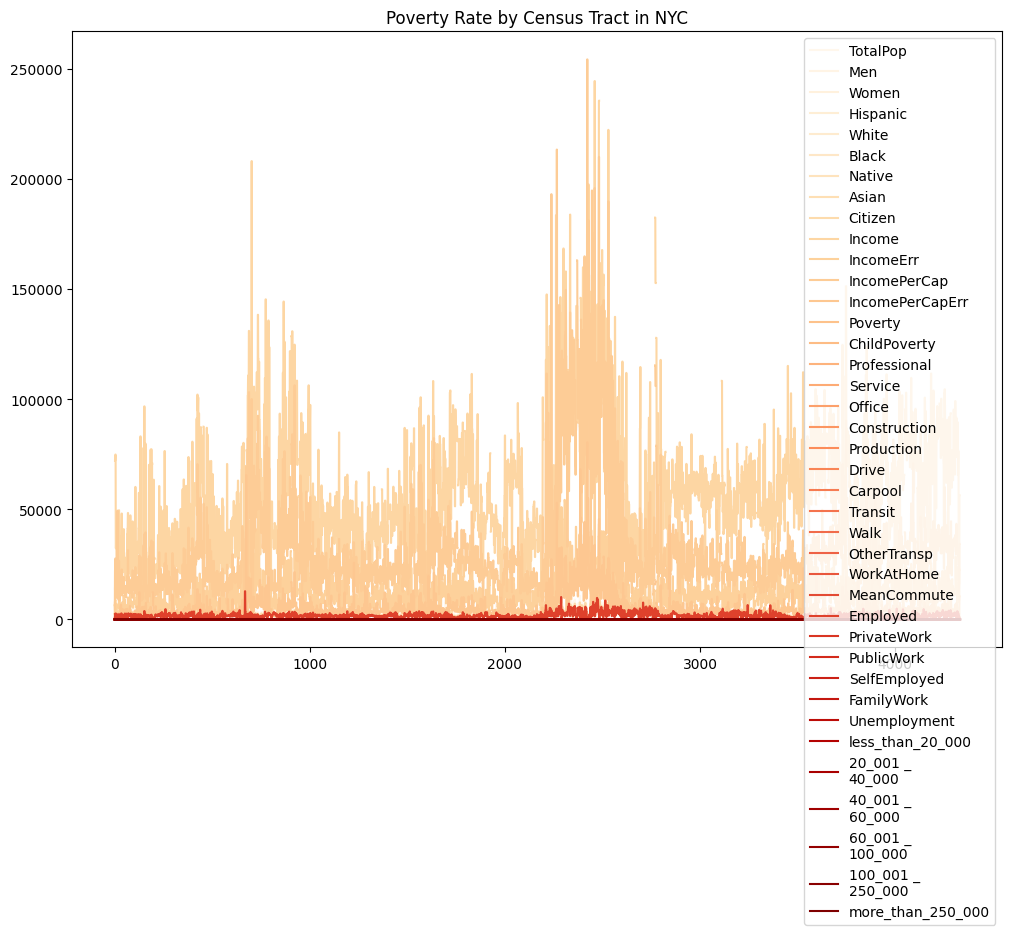

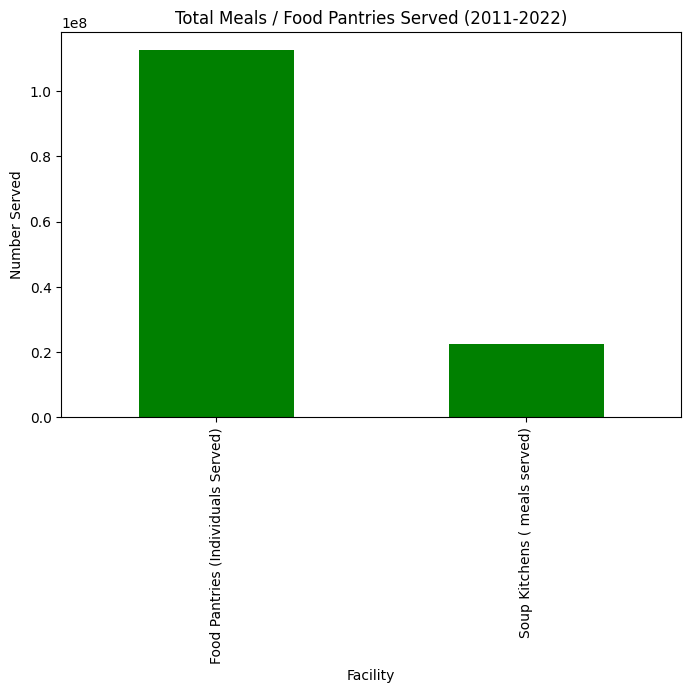

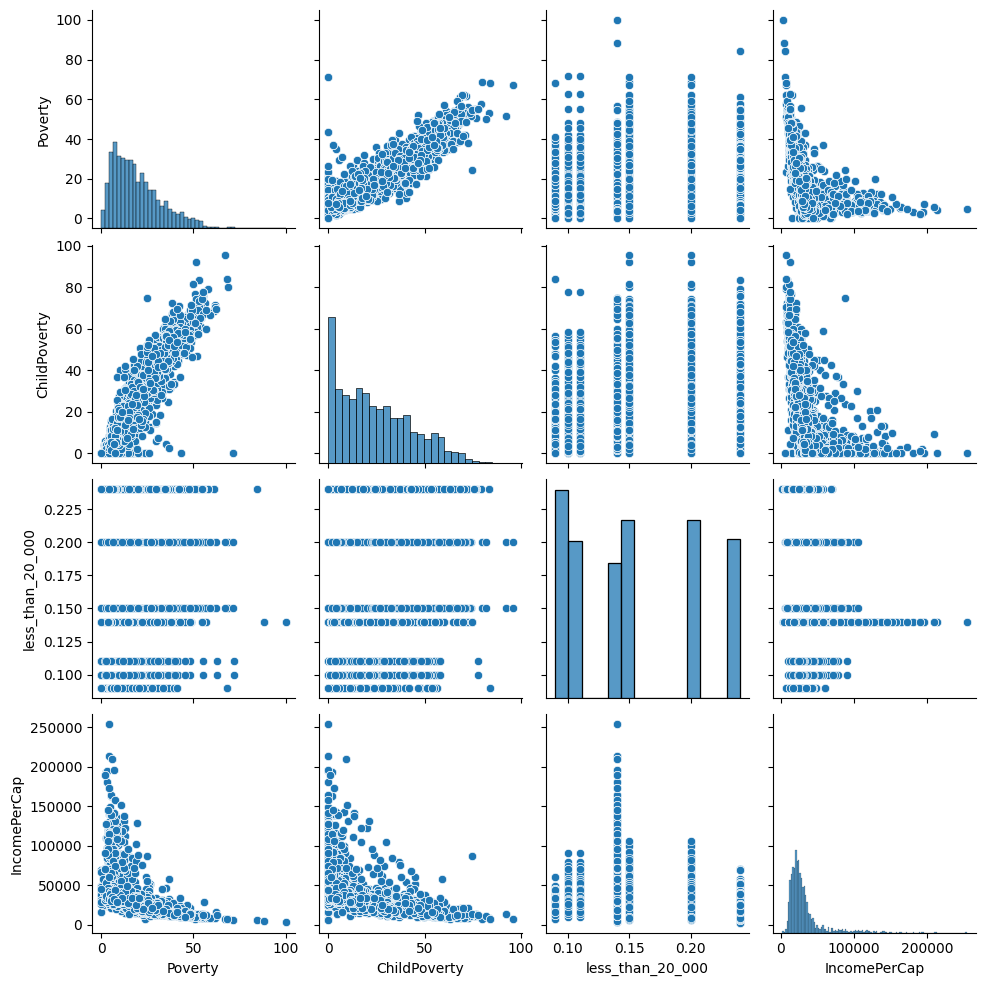

In [21]:
# visualize key metrics

import seaborn as sns
import matplotlib.pyplot as plt

# poverty rate distribution
sns.histplot(merged['Poverty'], bins=20, kde=True)
plt.title('NYC Census Tracts: Poverty Rate Distribution')
plt.xlabel('Poverty Rate (%)')
plt.show()

print("\n")

# income bracket vs borough
sns.boxplot(x='Borough', y='less_than_20_000', data=merged)
plt.title('Proportion of Low-Income Households by Borough')
plt.show()

print("\n")

# correlation heat map
corr_cols = ['Poverty','ChildPoverty','IncomePerCap','less_than_20_000','TotalPop']
sns.heatmap(merged[corr_cols].corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

print("\n")

# child povery distribution
sns.histplot(merged['ChildPoverty'], bins=25, kde=True, color='orange')
plt.title('Distribution of Child Poverty Across NYC Census Tracts')
plt.xlabel('Child Poverty Rate (%)')
plt.ylabel('Number of Tracts')
plt.show()

print("\n")

# poverty vs income per capita
sns.scatterplot(x='IncomePerCap', y='Poverty', hue='Borough', data=merged)
plt.title('Poverty vs Income Per Capita by Borough')
plt.xlabel('Income Per Capita ($)')
plt.ylabel('Poverty Rate (%)')
plt.show()

print("\n")

# race/ethnicity composition by borough
racial_cols = ['Hispanic', 'White', 'Black', 'Native', 'Asian']
borough_race = merged.groupby('Borough')[racial_cols].mean()

borough_race.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set3')
plt.title('Average Racial/Ethnic Composition by Borough')
plt.ylabel('Percentage (%)')
plt.show()

print("\n")

# choropleth map of povery
merged.plot(column='Poverty', cmap='OrRd', legend=True, figsize=(12,8))
plt.title('Poverty Rate by Census Tract in NYC')
plt.show()

print("\n")

# food assistance vs poverty
food['Number'] = pd.to_numeric(food['Number'], errors='coerce')
food_grouped = food.groupby('Facility')['Number'].sum()
food_grouped.plot(kind='bar', figsize=(8,5), color='green')
plt.title('Total Meals / Food Pantries Served (2011-2022)')
plt.ylabel('Number Served')
plt.show()


print("\n")

# pairplot of key variables
sns.pairplot(merged[['Poverty','ChildPoverty','less_than_20_000','IncomePerCap']])
plt.show()

print("\n")

## Milestone 3: Exploratory Data Analysis (EDA) - Analysis

Based on the exploratory data analysis of poverty, income, child poverty, racial composition, and food assistance in New York City, the following conclusions can be drawn:

### 1. Poverty Distribution Across NYC
- Most neighborhoods (census tracts) have a **low to moderate poverty rate**.  
- Over 700 neighborhoods have poverty rates between 0% and 20%, while very few neighborhoods have extremely high poverty rates (60%+).  
- In simple terms: poverty is **spread out**, with most areas experiencing relatively low levels, though some tracts are still at risk.

### 2. Poverty by Borough
- There is a clear ranking of poverty across boroughs:
  1. **Bronx** – highest proportion of low-income households  
  2. **Brooklyn**  
  3. **Manhattan**  
  4. **Queens**  
  5. **Staten Island** – lowest proportion of low-income households  
- Conclusion: **Poverty is not evenly distributed** in the city; the Bronx bears the heaviest burden.

### 3. Correlation Insights
- Poverty and Child Poverty are **strongly linked** (correlation ≈ 0.91).  
- Poverty and Income per Capita are **strongly inversely related** (correlation ≈ -0.5).  
- In simple terms: neighborhoods with higher poverty almost always have higher child poverty and lower income per person.

### 4. Child Poverty
- Child poverty is **more severe and widespread** than overall poverty.  
- Many neighborhoods have moderate to high child poverty (20%-40%), and a notable number of tracts experience very high child poverty rates.  
- Conclusion: **Children in NYC are disproportionately affected** by poverty compared to the general population.

### 5. Poverty vs Income by Borough
- Boroughs with **higher average income** have **lower poverty rates**.  
- The Bronx is high poverty/low income, while Staten Island and Queens are lower poverty/higher income.  
- Manhattan shows high income but mixed poverty levels, reflecting **income inequality** within the borough.  

### 6. Racial/Ethnic Composition by Borough
- Each borough has a **distinct racial/ethnic profile**:  
  - Bronx: Majority Hispanic and Black  
  - Brooklyn and Queens: Diverse mix of Black, Hispanic, White, and Asian  
  - Staten Island: Predominantly White  
  - Manhattan: Balanced mix of White, Hispanic, and Black residents  
- Conclusion: **NYC is a mosaic of communities**, and racial/ethnic diversity varies greatly by borough.

### 7. Food Assistance Programs
- Food assistance (pantries and soup kitchens) usage **spiked dramatically during the COVID-19 pandemic**, reflecting increased need.  
- Before 2020, usage was relatively stable; post-2020, demand remains high.  
- Conclusion: **Food insecurity intensified due to the pandemic**, emphasizing the need for continued support in high-poverty areas.

### Overall Takeaways
- Poverty and child poverty are **concentrated** in certain boroughs (especially the Bronx and parts of Brooklyn).  
- Income inequality, racial/ethnic demographics, and food assistance coverage highlight **structural disparities** in NYC.  
- These insights can inform **targeted interventions** for the "No Poverty" UN Sustainable Development Goal, focusing resources where neighborhoods are most at risk.


## Milestone 4: Predictive Modeling - Implementation & Visuals

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# clean column names
merged.columns = merged.columns.str.replace(r"[\s\n]", "", regex=True)

# select features and target
feature_cols = [
    'less_than_20_000', '20_001_40_000', '40_001_60_000', '60_001_100_000',
    '100_001_250_000', 'more_than_250_000',
    'Hispanic', 'White', 'Black', 'Native', 'Asian',
    'Professional', 'Service', 'Office', 'Construction', 'Production',
    'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome'
]

# drop rows with missing target
model_data = merged.dropna(subset=['Poverty'])
X = model_data[feature_cols]
y = model_data['Poverty']

# split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# impute missing values with median
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# define models to test
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Hist Gradient Boosting": HistGradientBoostingRegressor(max_iter=100, random_state=42)
}

# train, predict, and evaluate each model
for name, model in models.items():
    model.fit(X_train_imputed, y_train)
    y_pred = model.predict(X_test_imputed)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} -> MSE: {mse:.4f}, R^2: {r2:.4f}")

Linear Regression -> MSE: 71.7849, R^2: 0.5695
Random Forest -> MSE: 16.4242, R^2: 0.9015
Gradient Boosting -> MSE: 42.3745, R^2: 0.7459
Hist Gradient Boosting -> MSE: 22.6856, R^2: 0.8639


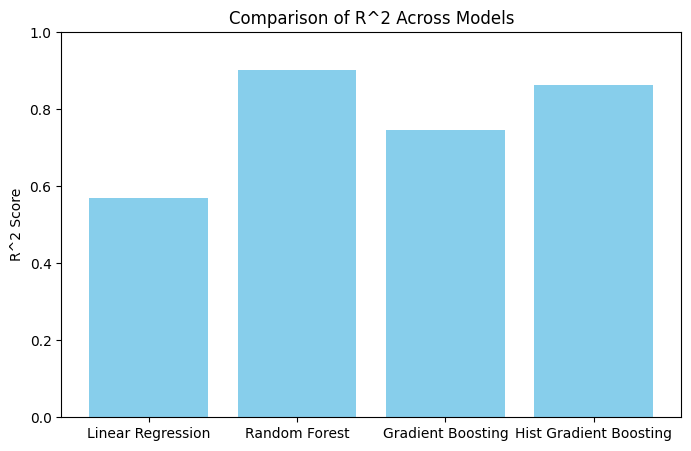

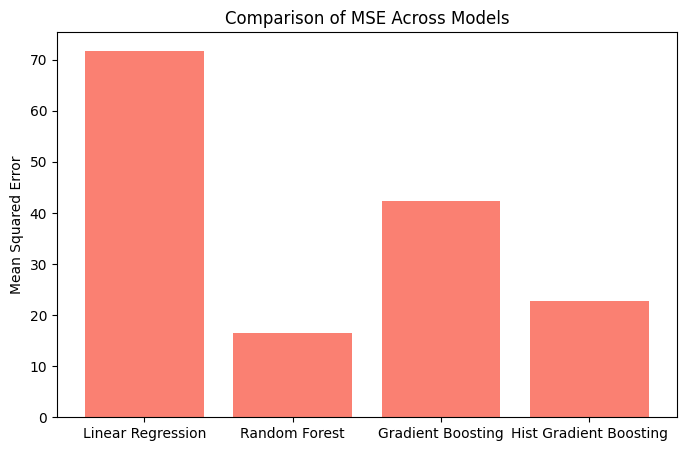

In [38]:
import matplotlib.pyplot as plt

# bar chart of model performance
models_list = ["Linear Regression", "Random Forest", "Gradient Boosting", "Hist Gradient Boosting"]
mse_list = [71.7849, 16.4242, 42.3745, 22.6856]
r2_list = [0.5695, 0.9015, 0.7459, 0.8639]

# plot R^2
plt.figure(figsize=(8,5))
plt.bar(models_list, r2_list, color='skyblue')
plt.ylabel('R^2 Score')
plt.title('Comparison of R^2 Across Models')
plt.ylim(0,1)
plt.show()

# plot MSE
plt.figure(figsize=(8,5))
plt.bar(models_list, mse_list, color='salmon')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of MSE Across Models')
plt.show()

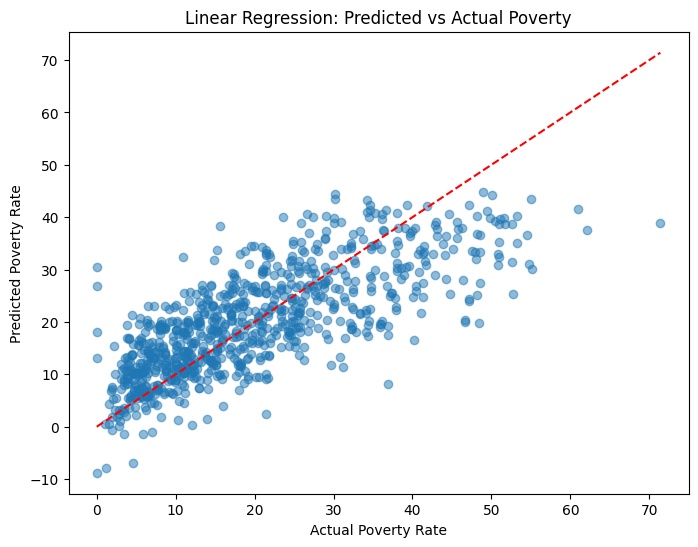

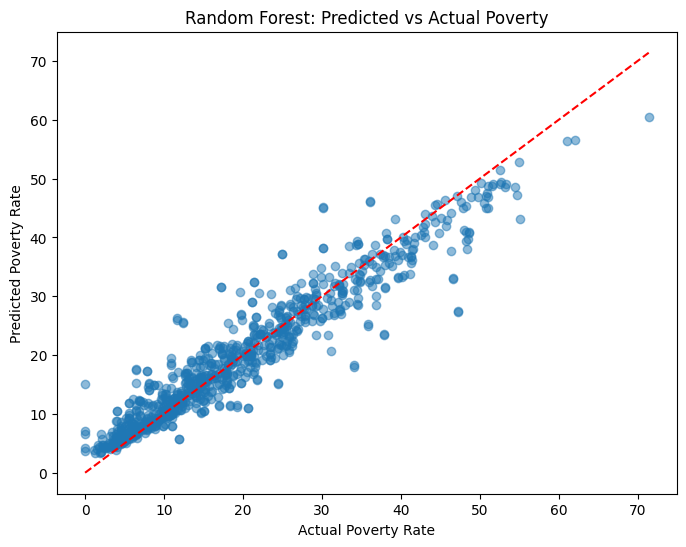

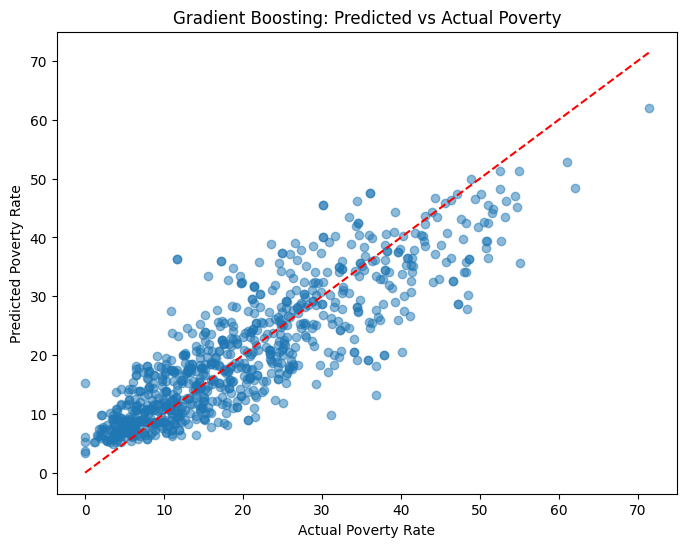

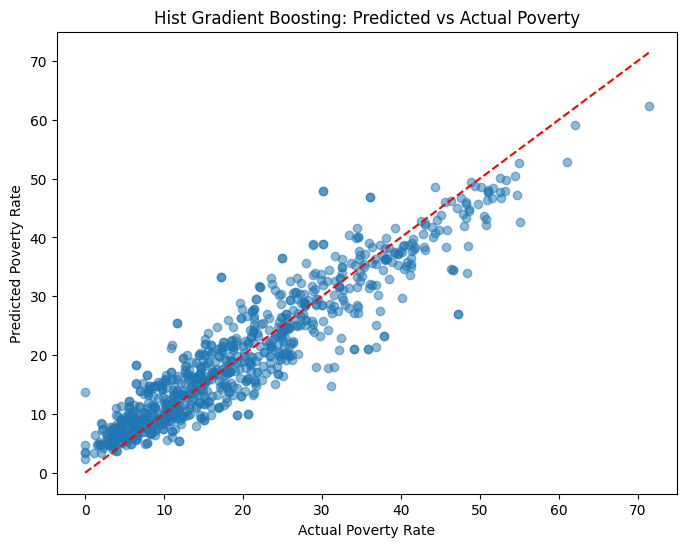

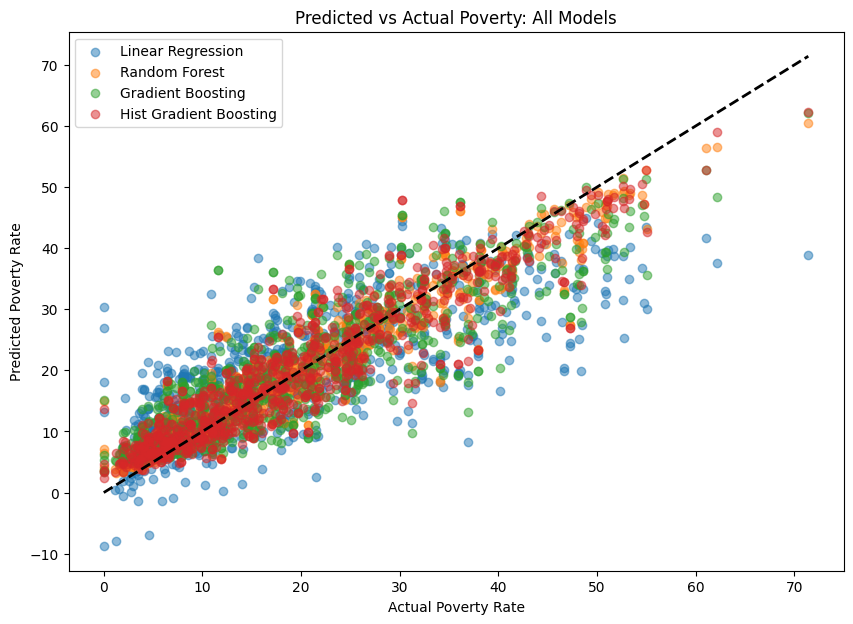

/tmp/ipython-input-1131490316.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_importance.values, y=feat_importance.index, palette='viridis')


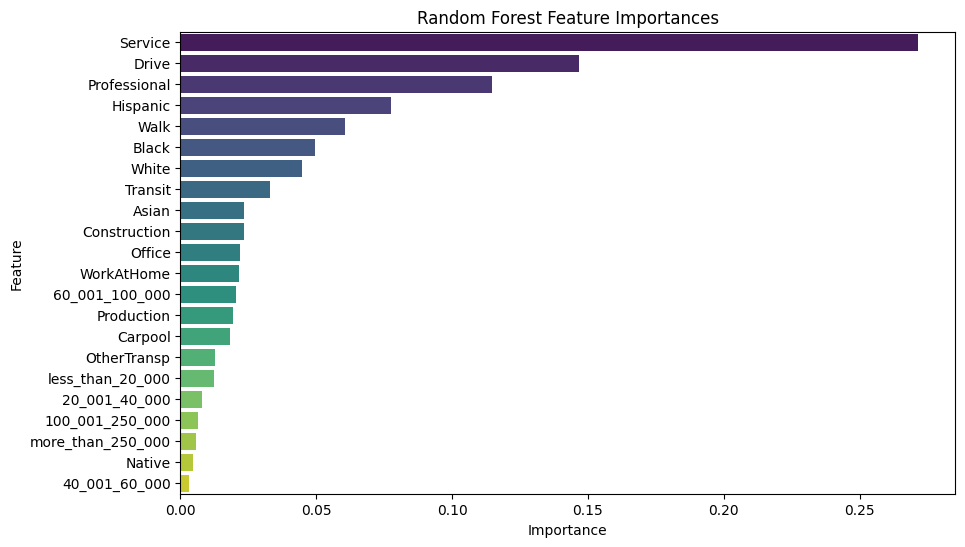

/tmp/ipython-input-1131490316.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_importance.values, y=feat_importance.index, palette='viridis')


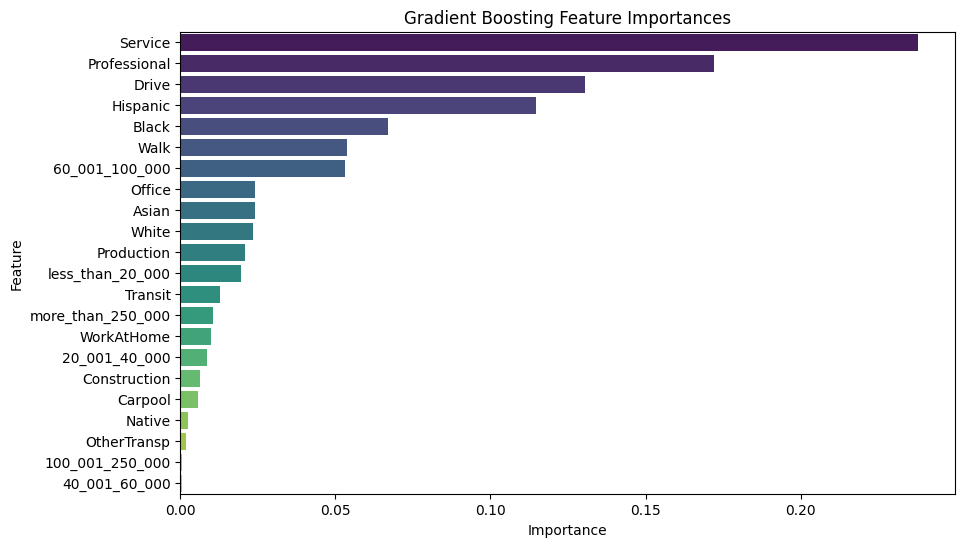

/tmp/ipython-input-1131490316.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_importance.values, y=feat_importance.index, palette='viridis')


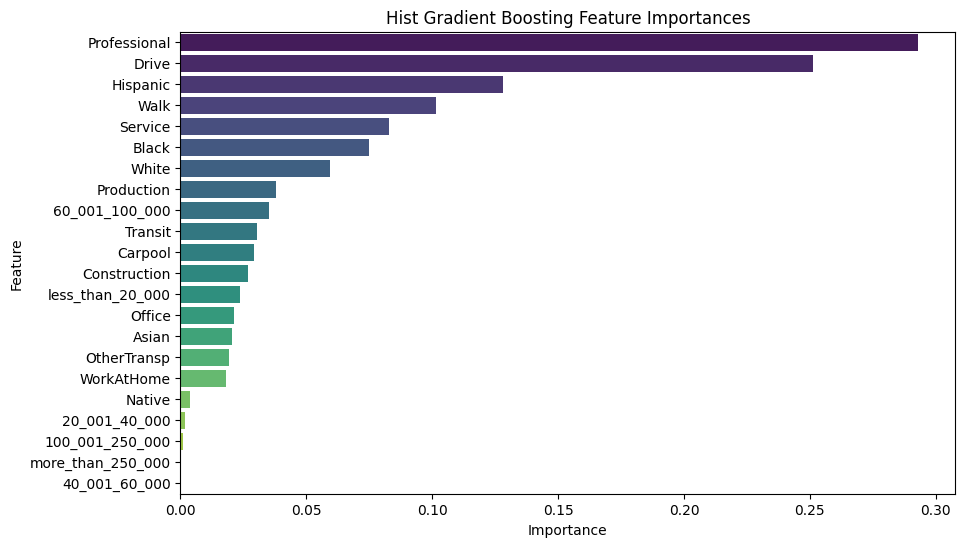

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.inspection import permutation_importance

# individual predicted vs actual plots
for name, model in models.items():
    y_pred = model.predict(X_test_imputed)

    plt.figure(figsize=(8,6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Poverty Rate')
    plt.ylabel('Predicted Poverty Rate')
    plt.title(f'{name}: Predicted vs Actual Poverty')
    plt.show()


# 2️combined predicted vs actual plot
plt.figure(figsize=(10,7))
for name, model in models.items():
    y_pred = model.predict(X_test_imputed)
    plt.scatter(y_test, y_pred, alpha=0.5, label=name)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # perfect prediction line
plt.xlabel('Actual Poverty Rate')
plt.ylabel('Predicted Poverty Rate')
plt.title('Predicted vs Actual Poverty: All Models')
plt.legend()
plt.show()


# feature Importance for tree-based models

tree_models = ["Random Forest", "Gradient Boosting", "Hist Gradient Boosting"]

for name in tree_models:
    model = models[name]

    # compute feature importance
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
    else:
        # use permutation importance as fallback
        result = permutation_importance(model, X_test_imputed, y_test, n_repeats=10, random_state=42)
        importances = result.importances_mean

    feat_importance = pd.Series(importances, index=feature_cols).sort_values(ascending=False)

    plt.figure(figsize=(10,6))
    sns.barplot(x=feat_importance.values, y=feat_importance.index, palette='viridis')
    plt.title(f'{name} Feature Importances')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()


In [55]:
from sklearn.inspection import permutation_importance
import numpy as np
import pandas as pd

for name, model in models.items():
    print(f"\n{name} Feature Importances (Ranked):")

    # get feature importance
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
    elif hasattr(model, "coef_"):  # linear regression
        importances = np.abs(model.coef_)
    else:
        # fallback for models like HistGradientBoosting
        result = permutation_importance(model, X_test_imputed, y_test, n_repeats=10, random_state=42)
        importances = result.importances_mean

    # create a series and sort
    feat_importance = pd.Series(importances, index=feature_cols).sort_values(ascending=False)

    # print ranked features
    for i, (feat, imp) in enumerate(feat_importance.items(), 1):
        print(f"{i}. {feat}: {imp:.4f}")



Linear Regression Feature Importances (Ranked):
1. 60_001_100_000: 212.2402
2. 20_001_40_000: 199.8081
3. more_than_250_000: 120.1063
4. 40_001_60_000: 52.2875
5. less_than_20_000: 9.2913
6. OtherTransp: 8.8955
7. Drive: 8.6973
8. Carpool: 8.4946
9. Transit: 8.4922
10. Walk: 8.2601
11. WorkAtHome: 8.1986
12. 100_001_250_000: 8.1422
13. Construction: 4.6864
14. Professional: 4.5489
15. Office: 4.2167
16. Production: 4.1276
17. Service: 4.0596
18. Native: 0.5306
19. Hispanic: 0.1969
20. White: 0.1024
21. Black: 0.0994
22. Asian: 0.0768

Random Forest Feature Importances (Ranked):
1. Service: 0.2717
2. Drive: 0.1466
3. Professional: 0.1145
4. Hispanic: 0.0776
5. Walk: 0.0606
6. Black: 0.0497
7. White: 0.0448
8. Transit: 0.0330
9. Asian: 0.0235
10. Construction: 0.0233
11. Office: 0.0220
12. WorkAtHome: 0.0215
13. 60_001_100_000: 0.0206
14. Production: 0.0194
15. Carpool: 0.0183
16. OtherTransp: 0.0128
17. less_than_20_000: 0.0122
18. 20_001_40_000: 0.0078
19. 100_001_250_000: 0.0066
20. 

## Milestone 5: Predictive Modeling - Analysis

### NYC Poverty Prediction Models: Summary

## Overview
Four models were built to predict neighborhood (census tract) poverty rates in NYC:  

1. **Linear Regression** – classic, simple model.  
2. **Random Forest** – complex, modern ensemble model.  
3. **Gradient Boosting** – complex, modern ensemble model.  
4. **Hist Gradient Boosting** – fast, efficient variation of Gradient Boosting.  

**Goal:** Identify the most accurate model for predicting poverty.

---

## Feature Importances (Ranked)

### Linear Regression
1. `60_001_100_000`: 212.2402  
2. `20_001_40_000`: 199.8081  
3. `more_than_250_000`: 120.1063  
4. `40_001_60_000`: 52.2875  
5. `less_than_20_000`: 9.2913  
6. `OtherTransp`: 8.8955  
7. `Drive`: 8.6973  
8. `Carpool`: 8.4946  
9. `Transit`: 8.4922  
10. `Walk`: 8.2601  
11. `WorkAtHome`: 8.1986  
12. `100_001_250_000`: 8.1422  
13. `Construction`: 4.6864  
14. `Professional`: 4.5489  
15. `Office`: 4.2167  
16. `Production`: 4.1276  
17. `Service`: 4.0596  
18. `Native`: 0.5306  
19. `Hispanic`: 0.1969  
20. `White`: 0.1024  
21. `Black`: 0.0994  
22. `Asian`: 0.0768  

### Random Forest
1. `Service`: 0.2717  
2. `Drive`: 0.1466  
3. `Professional`: 0.1145  
4. `Hispanic`: 0.0776  
5. `Walk`: 0.0606  
6. `Black`: 0.0497  
7. `White`: 0.0448  
8. `Transit`: 0.0330  
9. `Asian`: 0.0235  
10. `Construction`: 0.0233  
11. `Office`: 0.0220  
12. `WorkAtHome`: 0.0215  
13. `60_001_100_000`: 0.0206  
14. `Production`: 0.0194  
15. `Carpool`: 0.0183  
16. `OtherTransp`: 0.0128  
17. `less_than_20_000`: 0.0122  
18. `20_001_40_000`: 0.0078  
19. `100_001_250_000`: 0.0066  
20. `more_than_250_000`: 0.0057  
21. `Native`: 0.0045  
22. `40_001_60_000`: 0.0032  

### Gradient Boosting
1. `Service`: 0.2380  
2. `Professional`: 0.1721  
3. `Drive`: 0.1306  
4. `Hispanic`: 0.1146  
5. `Black`: 0.0671  
6. `Walk`: 0.0539  
7. `60_001_100_000`: 0.0531  
8. `Office`: 0.0241  
9. `Asian`: 0.0241  
10. `White`: 0.0235  
11. `Production`: 0.0209  
12. `less_than_20_000`: 0.0194  
13. `Transit`: 0.0126  
14. `more_than_250_000`: 0.0105  
15. `WorkAtHome`: 0.0099  
16. `20_001_40_000`: 0.0085  
17. `Construction`: 0.0062  
18. `Carpool`: 0.0056  
19. `Native`: 0.0024  
20. `OtherTransp`: 0.0018  
21. `100_001_250_000`: 0.0007  
22. `40_001_60_000`: 0.0005  

### Hist Gradient Boosting
- Feature importances can be extracted using **permutation importance**.  

---

## Model Performance Comparison

| Model                    | MSE     | R²      |
|---------------------------|---------|---------|
| Linear Regression         | 71.78   | 0.5695  |
| Random Forest             | 16.42   | 0.9015  |
| Gradient Boosting         | 42.37   | 0.7459  |
| Hist Gradient Boosting    | 22.68   | 0.8639  |

**Interpretation:**  
- **R²** measures how well the model explains the variance in poverty rates (closer to 1 = better).  
- **MSE** measures the average prediction error (lower = better).  

**Takeaways:**  
- Linear Regression performs poorly.  
- Random Forest, Gradient Boosting, and Hist Gradient Boosting are significantly better.  
- Random Forest slightly outperforms Gradient Boosting and Hist Gradient Boosting, but all three are strong.  

---

## Visual Insights

### Predicted vs Actual Poverty
- Scatter plots show how closely each model predicts true poverty rates.  
- Perfect predictions fall along a diagonal line.  
- **Linear Regression:** wide, fuzzy scatter.  
- **Random Forest, Gradient Boosting, Hist Gradient Boosting:** tight clustering along diagonal → highly accurate.  

### Key Takeaways
- Advanced tree-based models are excellent for predicting neighborhood poverty.  
- Linear Regression is not suitable for this task.  
- Recommended models for policy and resource allocation: **Random Forest** or **Gradient Boosting**.